<a href="https://colab.research.google.com/github/joshuaggiles/ISEN-370-Project-1/blob/main/ISEN_370_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this project, you will use data science tools to study sampling distributions and construct confidence interval. <br>



# Import Libraries
Import necessary libraries for the project. Use ISEN 370 Project 2 Demo as an example. <br>
For your convenience, two libraries have been included below:






 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics as stat
import math as math
from scipy.stats import t
from scipy.stats import chi2

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site.
We first import the LEWAS datasets. The data is stored in CSV files for which the path is given in the cell below.
The CSV file contains data from 9/28/2017-9/30/2017.<br>
We name this link data_url2.


In [2]:
data_url2='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_2.csv'

Import the dataset and print the first 10 rows of data. 

In [5]:
df1=pd.read_csv('https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_2.csv')
df1.head(10)


,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/28/17 12:00 AM,66.560,0.001469
1,9/28/17 12:03 AM,66.560,0.001471
2,9/28/17 12:06 AM,66.542,0.006522
3,9/28/17 12:09 AM,66.560,0.004293
4,9/28/17 12:12 AM,66.542,0.002252
5,9/28/17 12:15 AM,66.560,0.009034
6,9/28/17 12:18 AM,66.542,0.005067
7,9/28/17 12:21 AM,66.578,-0.001823
8,9/28/17 12:24 AM,66.542,-0.007261
9,9/28/17 12:27 AM,66.524,-0.011683


Let's focus on Estimated Flow Rate (m3/s) in this project. Create a new dataframe that only contains Est. Flow Rate [m3/s].

In [9]:
df2=df1['Est. Flow Rate[m^3/s]']

# Exploring Data

Let's investigate the distribution of the variable Est. Flow Rate[m^3/s].

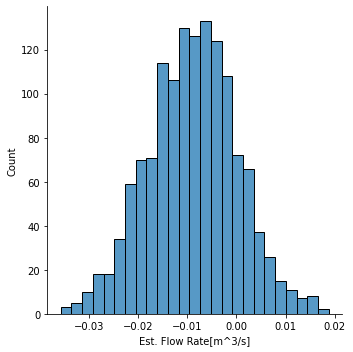

In [10]:
sns.displot(df2)

***Comment on the shape of the distribution.***
<br>
***Answer:***
<br> The shape of the curve resembles that of a bell shaped curve. This means the distribution is normal.


#Box plot
Box plots can be used to check if there are outliers in the data set and can also be used to check for normality.

DataFrame.boxplot(column=, grid=True, ...) can be used to generate boxplots for selected columns. use column= to specify the columns you would like to use to create boxplots and use grid=Fasle to not display grids (by default it is True).



Generate Boxplot for Est. Flow Rate[m^3/s] in year 2017.



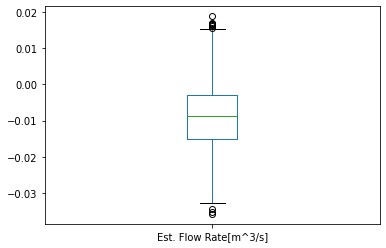

In [11]:
boxplot1 = df1.boxplot(column=["Est. Flow Rate[m^3/s]"],grid=False)

***Comment on the boxplot. Are there any outliers?*** 
<br>
***Answer:*** <br>


There are many outliers for the year 2017.

## Sampling Distribution

Now, let's build sampling distribution for the mean of Est. Flow Rate[m^3/s]. 

First, let's create an array that represents the population using to_numpy() function.

In [12]:
a1=df2.to_numpy()

The sampling distribution consists of sample means from many samples of a certian size. We will build a function to randomly sample the population based on the sample size and number of samples.

The function is named sample_mean_calculator() and has three parameters: population_array, sample_size, and n_samples. population_array is the population. In our case, it would be a1. sample size is the number of observations in each sample. We will change the sample size and study the impact on the distribution. n_samples provides the number of samples.

First, we define sample_means as an empty list [].
We then use a loop to get each of the n samples.
For each sample, we randomly generate a sample of size sample_size.
The NumPy random choice() function is used to gets the random samples of a one-dimensional array which returns as the random samples of NumPy array. The NumPy random choice() function is a built-in function in the NumPy package of python.
We calculate the sample mean for each sample using stat.mean() function and add it to the sample_means list.

In [13]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

Let's generate a sampling distribution using sample size 10 and  10 samples.
Visualize the distribution of the data using sns.displot().

In [14]:
s0=pd.Series(sample_mean_calculator(a1, 10, 10), name="Est. Flow Rate (\N{DEGREE SIGN}F)")

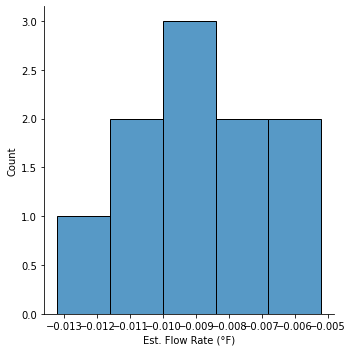

In [15]:
sns.displot(s0)

Let's try sample size 30, and 10000 samples.

In [16]:
s1=pd.Series(sample_mean_calculator(a1, 30, 10000), name="Est. Flow Rate (\N{DEGREE SIGN}F)")

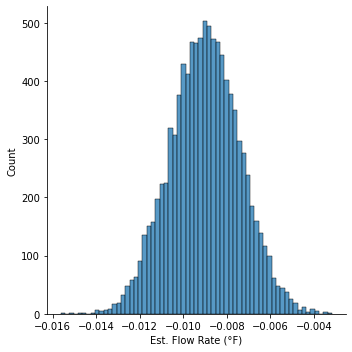

In [17]:
sns.displot(s1)

Let's try sample size of 100, 10000 samples.

In [19]:
s2=pd.Series(sample_mean_calculator(a1, 100, 10000), name="Est. Flow Rate (\N{DEGREE SIGN}F)")

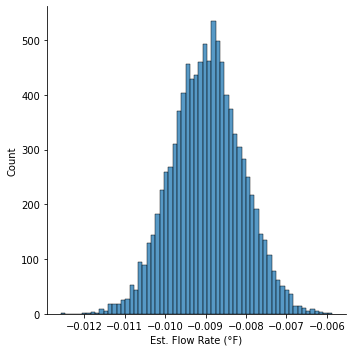

In [20]:
sns.displot(s2)

<b>Question:</b> What did you observe from the three sampling distributions generated above?<br>
<b>Answer:</b>


Each of the generated graphs still favored a bell shaped curve. It can be derived that the distribution is normal for each.

## Using Sampling Distribution of the Mean and Vairance to Do Calculation

1. Assuming the population mean (mean Est. Flow Rate[m^3/s] in 2017) is -0.09.  The variance of a sample of 26 observations is 0.0004. What is the probability of the mean Est. Flow Rate[m^3/s] is <b> greater</b> than -0.13?

Test statistic for the sampling distribution of mean is t.<br>
$t=\frac{x̄-μ}{\sqrt\frac{s^2}{n-1}}$ with degree of freedom n-1.<br>
The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x.

In [25]:
t1=((-0.13)-(-0.09))/math.sqrt(0.0004/(26-1))

In [26]:
1-t.cdf(x=t1, df=25)

0.9999999998396795

<b>Question:</b> <br>
What is the probability of the mean Est. Flow Rate[m^3/s] is greater than -0.13? <br>
<b>Answer:</b> <br>


The probability of the mean Est. Flow Rate[m^3/s] is greater than -0.13 is 0.99.

2. Assume the variance of the Est. Flow Rate[m^3/s] is 0.0009. What is the probability that the sample variance is <b>greater</b> than 0.0005?

In [29]:
t1=((-0.13)-(-0.09))/math.sqrt(0.0009/(26-1))

In [30]:
1-t.cdf(x=t1, df=25)

0.9999997248054109

 The probability that the sample variance is greater than 0.0005 is 0.99.

Test statistic for sampling distribution of variance is $\chi^2$. <br>
$\chi^2=\frac{(n-1)s^2}{\sigma^2}$ with degree of freedom n-1.

In [31]:
c1=(26-1)*0.0004/25

In [32]:
chi2.cdf(c1, 25)

3.385795796217963e-56

<b>Question:</b> <br>What is the probability that the sample variance is greater than 0.0005? <br>
<b>Answer:</b> <br>

##Confidence Interval
The (1-α)% confidence interval provides a range of values that you can be (1-α)% confident contains/captures the true mean of the population. Due to natural sampling variability, the sample mean (center of the CI) will vary from sample to sample.

Practically, it usually is near impossible to study the entire population. Researchers can only work on samples of the population and estimate parameters of the popultion using sample statistics.Therefore, a confidence interval is simply a way to measure how well the sample represents the population. 

It is important to point out that the confidence is in the **method**, not in a particular interval. If we repeat the sampling method many times, approximately 95% of the intervals constructed would **capture** the true population mean.

Therefore, as the sample size increases, the range of interval values will be narrower, meaning that the estimationbeing more accurate compared with a smaller sample.
<br>
<br>
In this project, we can construct confidence interval based on the sample data collected.
<br>
From the histogram and bloxplot, we have already estabished that the data is not normally distributed. However, give the large sample size, using the central limit theorem, we know the sampling distribution of the mean will follow a normal distribution. The following code will generate the 95% confidence interval for the mean water temperatue for year 2016. The code will generate the upper level and lower level of the confidence interval based on the sample.

stats.norm.interval(alpha=,loc=scale=) function is used to genetate the confidence interval. alpha provides the significance level, 1-alpha is the confidence, loc is the mean and scale is the standard deviation of the sample mean.

numpy.mean() function provides the sample mean and stats.sem() computes the sandard error of the mean.

Let's randomly select a sample of 200 observations from the population (Est. Flow Rate[m^3/s]).

In [27]:
data=np.random.choice(df2, size=200, replace=False)

Construct a 95% confidence interval for the mean Est. Flow Rate[m^3/s] using the sample data generated.

In [28]:
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(-0.011193980834196328, -0.008812785285803678)

***Interpret the confidence interval you generated.***
<br>
***Answer:***
<br>

There is 95% chance that the interval (-0.011193980834196328, -0.008812785285803678) will capture the true mean water temperature for year 2016.